In [43]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [44]:
df = pd.read_csv('../../dataset/Microsoft_Stock.csv')

In [45]:
scaler = MinMaxScaler()
data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

In [46]:
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [47]:
sequence_length = 50
X, y = create_sequences(data, sequence_length)
X = X.reshape((X.shape[0], X.shape[1], 1))


In [48]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
def plot_loss(history, title):
    plt.figure(figsize=(8, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [50]:
rnn_model = Sequential([
    SimpleRNN(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    SimpleRNN(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/50


37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0977 - val_loss: 0.0021
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0072 - val_loss: 6.9295e-04
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0061 - val_loss: 6.9270e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0052 - val_loss: 1.2824e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0049 - val_loss: 3.5231e-04
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0044 - val_loss: 2.8673e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0049 - val_loss: 0.0016
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0041 - val_loss: 2.8231e-04
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - val_loss: 0.0027
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0037 - val_loss: 2.7517e-04
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0035 - val_loss: 6.2680e-04
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 

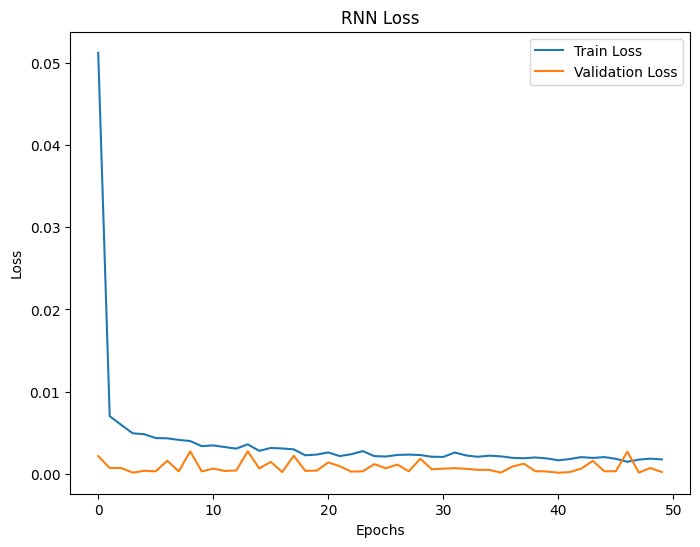

In [58]:
plot_loss(rnn_history, 'RNN Loss')

In [54]:
rnn_predictions = rnn_model.predict(X_test)
rnn_r2 = r2_score(y_test, rnn_predictions)
rnn_r2

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


0.9971377973470941

In [55]:
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, activation='relu'),
    Dropout(0.2),
    Dense(1)
])


C:\Users\71519\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')


In [62]:
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0022 - val_loss: 3.0848e-04
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0021 - val_loss: 5.6058e-04
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0020 - val_loss: 3.4268e-04
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020 - val_loss: 2.8595e-04
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020 - val_loss: 4.7658e-04
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0022 - val_loss: 3.1991e-04
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0023 - val_loss: 9.6252e-04
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0021 - val_loss: 2.8518e-04
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0021 - val_loss: 3.7087e-04
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0017 - val_loss: 2.9701e-04
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0021 - val_loss: 6.7945e-04
Epoch 12/50
37/37 ━

In [63]:
lstm_predictions = lstm_model.predict(X_test)
lstm_r2 = r2_score(y_test, lstm_predictions)
lstm_r2

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


0.9933760867332178

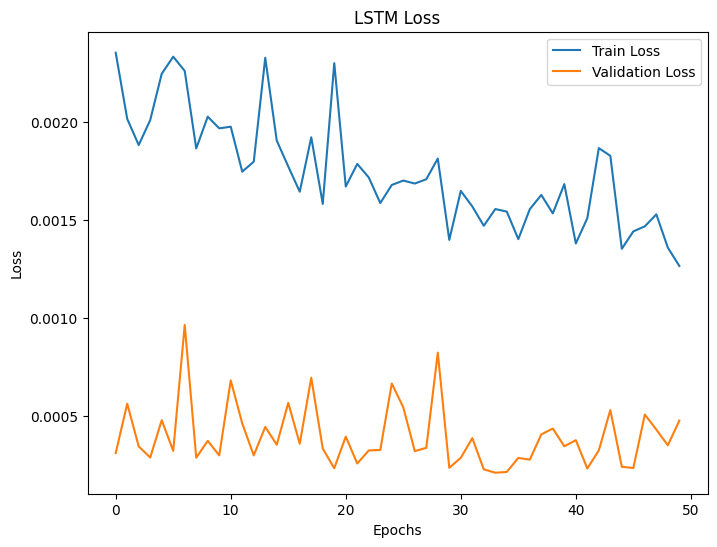

In [64]:
plot_loss(lstm_history, 'LSTM Loss')


In [67]:
def plot_actual_vs_predicted(y_actual, y_predicted, title):
    plt.figure(figsize=(10, 6))
    plt.plot(y_actual, label='Actual Values', color='blue')
    plt.plot(y_predicted, label='Predicted Values', color='red', linestyle='dashed')
    plt.title(title)
    plt.xlabel('Samples')
    plt.ylabel('Normalized Value')
    plt.legend()
    plt.show()

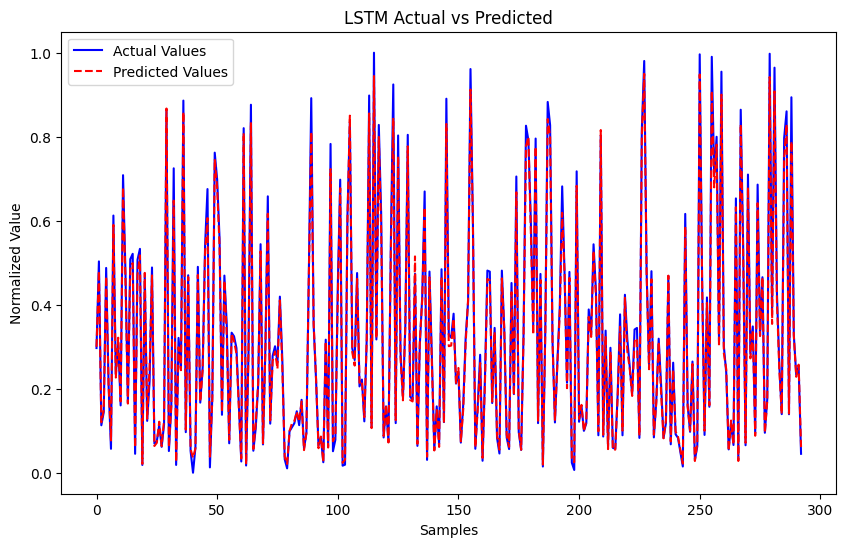

In [68]:
plot_actual_vs_predicted(y_test, lstm_predictions, 'LSTM Actual vs Predicted')